# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

[Carga las librerías que crees que son necesarias para el proyecto. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

[Carga los datos del proyecto y mira la información general.]

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv("vehicles_us.csv")
except:
    df = pd.read_csv("/datasets/vehicles_us.csv")


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [3]:
# imprime la información general/resumida sobre el DataFrame
print("Información general de los datos")
print()
df.info()
print()
df.shape


Información general de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



(51525, 13)

In [4]:
# imprimir una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


[Describe lo que observas en la información general y la muestra de datos impresos. ¿Existe algún problema que pueda necesitar investigación y cambios adicionales?]

**Según la información reflejada, podemos ver que las columnas "model_year", "cylinders", "odometer", "paint_color" y "is_4wd", todos tienen algunos datos faltantes o 'NaNs'. También observé que existen datos de tipo float que tendré que convertir a int, como tambien la columna de fecha de publicación es de tipo objeto, por lo que deberemos cambiarla a tipo datatime**

In [6]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

[¿Hay columnas con tipos de datos inapropiados?]

In [7]:
val_au_porcentaje = (df.isnull().sum() / len(df)) * 100
val_au_porcentaje

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

[¿Hay valores ausentes en todas las columnas o solo en algunas? ¿Qué columnas contienen la mayor cantidad de valores ausentes? Describe brevemente lo que ves en 1 o 2 oraciones.]

-**Tenemos valores ausentes en las columnas "model_year", "cylinders", "odometer", "paint_color" y "is_4wd". En los que la columna "is_4wd", existe el 50.3% de los datos totales. Tendremos que ver que hacer con esa columna.**

### Conclusiones y siguientes pasos

[Formula tus conclusiones sobre los datos iniciales. ¿Qué crees que se ve normal y qué no?]

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora. Específicamente, debe quedar claro qué parte de los datos deben tratarse para que sean más adecuados para el análisis requerido.]

-**Como conclusión temprana, dimos con 5 columnas con valores ausentes, de las cuáles pude ver que 2 columas: "model_year" y "cylinders" podemos eliminar esos datos NaN, dado el % bajo que tienen. No así las columnas que tienen mayor %, deberemos cambiar los tipos de datos, por ejemplo: "is_4wd", que por lo visto, son valores booleanos, donde 1 es True y 0 es False, por lo que transformaremos los datos NaN a "0".**

-**Transformaremos los tipos de columnas float a int.**

## Tratar los valores ausentes (si hay)

[Estudia los valores ausentes para cada columna en más detalle y decide qué hacer con ellos basándote en hipótesis significativas.]

In [8]:
#Reemplazar NaNs en la columna "is_4wd" con valor 0
df['is_4wd'].fillna(0, inplace = True)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [9]:
# Eliminar los valores NaNs en las columnas "model_year" y "cylinders"
df_nuevo = df.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
df_nuevo.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
5,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
6,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
7,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
8,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
9,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29


-**Ya que la columna "paint_color", tiene un 17% de valores ausentes, y no se puede sacar media o mediana a una columna con datos categoricos, transformaremos los valores NaN a "otro".

In [10]:
df_nuevo['paint_color'] = df_nuevo['paint_color'].fillna(value='otro')
df_nuevo.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,otro,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
5,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
6,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
7,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,otro,1.0,2018-07-16,19
8,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
9,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29


-**Revisando los datos de df.describe(), se visualizan valores atípicos en la columna "odometer", por lo que primero analizaremos como trabajar con los valores NaN.**

In [11]:
df_nuevo.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,43009.000000,43009.000000,43009.000000,36419.000000,43009.000000,43009.000000
mean,12168.670604,2009.761073,6.126276,115323.632747,0.496873,39.573671
std,10019.342590,6.266108,1.659540,65068.650067,0.499996,28.180113
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,69854.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000
75%,16900.000000,2014.000000,8.000000,155000.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000


In [12]:
median_df = df_nuevo['odometer'].median()

df_nuevo['odometer'] = df_nuevo['odometer'].fillna(median_df)
df_nuevo['odometer'].head(10)

0    145000.0
1    110000.0
2    113000.0
3     80903.0
4     57954.0
5     79212.0
6    109473.0
7    104174.0
8    128413.0
9    111142.0
Name: odometer, dtype: float64

In [13]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         43009 non-null  int64  
 1   model_year    43009 non-null  float64
 2   model         43009 non-null  object 
 3   condition     43009 non-null  object 
 4   cylinders     43009 non-null  float64
 5   fuel          43009 non-null  object 
 6   odometer      43009 non-null  float64
 7   transmission  43009 non-null  object 
 8   type          43009 non-null  object 
 9   paint_color   43009 non-null  object 
 10  is_4wd        43009 non-null  float64
 11  date_posted   43009 non-null  object 
 12  days_listed   43009 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.3+ MB


## Corregir los tipos de datos

[Ya que los datos están más o menos completos ahora, corrige los tipos de datos si es necesario.]

In [14]:
#Primero veremos los tipos de datos de cada columna
df_nuevo.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [15]:
# Cambiaremos las columnas que estan con tipo float a int, para leer mejor los datos
df_nuevo['model_year'] = df_nuevo['model_year'].astype('int64')
df_nuevo['cylinders'] = df_nuevo['cylinders'].astype('int64')
df_nuevo['odometer'] = df_nuevo['odometer'].astype('int64')
df_nuevo['is_4wd'] = df_nuevo['is_4wd'].astype('int64')

In [16]:
# Verificamos que el cambio haya resultado
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         43009 non-null  int64 
 1   model_year    43009 non-null  int64 
 2   model         43009 non-null  object
 3   condition     43009 non-null  object
 4   cylinders     43009 non-null  int64 
 5   fuel          43009 non-null  object
 6   odometer      43009 non-null  int64 
 7   transmission  43009 non-null  object
 8   type          43009 non-null  object
 9   paint_color   43009 non-null  object
 10  is_4wd        43009 non-null  int64 
 11  date_posted   43009 non-null  object
 12  days_listed   43009 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.3+ MB


In [17]:
# Cambiar el tipo de la columna "date_posted" a datetime
df_nuevo['date_posted'] = pd.to_datetime(df_nuevo['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [18]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         43009 non-null  int64         
 1   model_year    43009 non-null  int64         
 2   model         43009 non-null  object        
 3   condition     43009 non-null  object        
 4   cylinders     43009 non-null  int64         
 5   fuel          43009 non-null  object        
 6   odometer      43009 non-null  int64         
 7   transmission  43009 non-null  object        
 8   type          43009 non-null  object        
 9   paint_color   43009 non-null  object        
 10  is_4wd        43009 non-null  int64         
 11  date_posted   43009 non-null  datetime64[ns]
 12  days_listed   43009 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 4.3+ MB


## Enriquecer datos

[Agrega factores adicionales a los datos para facilitar el análisis.]

In [19]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df_nuevo['dow'] = df_nuevo['date_posted'].dt.dayofweek # Se crea día de la semana en cuál fue anunciado
df_nuevo['week'] = df_nuevo['date_posted'].dt.week # Se crea la semana del anuncio
df_nuevo['month'] = df_nuevo['date_posted'].dt.month # Se crea el mes del anuncio
df_nuevo['year'] = df_nuevo['date_posted'].dt.year # Se crea el año del anuncio


/tmp/ipykernel_25/581711956.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_nuevo['week'] = df_nuevo['date_posted'].dt.week # Se crea la semana del anuncio


In [20]:
df_nuevo.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019
2,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019
3,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019
4,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018


In [21]:
# Agrega los años del vehículo cuando el anuncio se colocó
df_nuevo['age_of_car'] = df_nuevo['year'] - df_nuevo['model_year']
df_nuevo.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018,7
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6
2,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019,16
3,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2
4,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4


In [22]:
df_nuevo['age_of_car'].describe()

count    43009.000000
mean         8.545397
std          6.277680
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_of_car, dtype: float64

In [23]:
# Agrega el millaje promedio del vehículo por año
df_nuevo['avg_odometer_year'] = df_nuevo['odometer'] / df_nuevo['age_of_car']
df_nuevo.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018,7,20714.285714
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333.333333
2,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019,16,7062.500000
3,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451.500000
4,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488.500000


In [24]:
df_nuevo['avg_odometer_year'].describe()

count    4.300800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.053533e+04
50%      1.544233e+04
75%      2.301767e+04
max               inf
Name: avg_odometer_year, dtype: float64

In [25]:
# Tendremos que convertir inf a NaN y cambiar NaN a 0 de tipo 'int'
import numpy as np

In [26]:
# Tendremos que convertir inf a NaN 
df_nuevo.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [27]:
df_nuevo.isnull().sum()

price                   0
model_year              0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
transmission            0
type                    0
paint_color             0
is_4wd                  0
date_posted             0
days_listed             0
dow                     0
week                    0
month                   0
year                    0
age_of_car              0
avg_odometer_year    1939
dtype: int64

In [28]:
df_nuevo['avg_odometer_year'].fillna(0, inplace = True)

In [29]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              43009 non-null  int64         
 1   model_year         43009 non-null  int64         
 2   model              43009 non-null  object        
 3   condition          43009 non-null  object        
 4   cylinders          43009 non-null  int64         
 5   fuel               43009 non-null  object        
 6   odometer           43009 non-null  int64         
 7   transmission       43009 non-null  object        
 8   type               43009 non-null  object        
 9   paint_color        43009 non-null  object        
 10  is_4wd             43009 non-null  int64         
 11  date_posted        43009 non-null  datetime64[ns]
 12  days_listed        43009 non-null  int64         
 13  dow                43009 non-null  int64         
 14  week  

In [30]:
# Pasamos el tipo de datos en "avg_odometer_year" de float a int
df_nuevo['avg_odometer_year'] = df_nuevo['avg_odometer_year'].astype('int64') 

In [31]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              43009 non-null  int64         
 1   model_year         43009 non-null  int64         
 2   model              43009 non-null  object        
 3   condition          43009 non-null  object        
 4   cylinders          43009 non-null  int64         
 5   fuel               43009 non-null  object        
 6   odometer           43009 non-null  int64         
 7   transmission       43009 non-null  object        
 8   type               43009 non-null  object        
 9   paint_color        43009 non-null  object        
 10  is_4wd             43009 non-null  int64         
 11  date_posted        43009 non-null  datetime64[ns]
 12  days_listed        43009 non-null  int64         
 13  dow                43009 non-null  int64         
 14  week  

In [32]:
df_nuevo['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [33]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
df_nuevo['condition'] = df_nuevo['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])
df_nuevo.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488


## Comprobar datos limpios

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [34]:
# imprime la información general/resumida sobre el DataFrame
df_nuevo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              43009 non-null  int64         
 1   model_year         43009 non-null  int64         
 2   model              43009 non-null  object        
 3   condition          43009 non-null  int64         
 4   cylinders          43009 non-null  int64         
 5   fuel               43009 non-null  object        
 6   odometer           43009 non-null  int64         
 7   transmission       43009 non-null  object        
 8   type               43009 non-null  object        
 9   paint_color        43009 non-null  object        
 10  is_4wd             43009 non-null  int64         
 11  date_posted        43009 non-null  datetime64[ns]
 12  days_listed        43009 non-null  int64         
 13  dow                43009 non-null  int64         
 14  week  

In [35]:
# imprimir una muestra de datos
df_nuevo.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488


## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

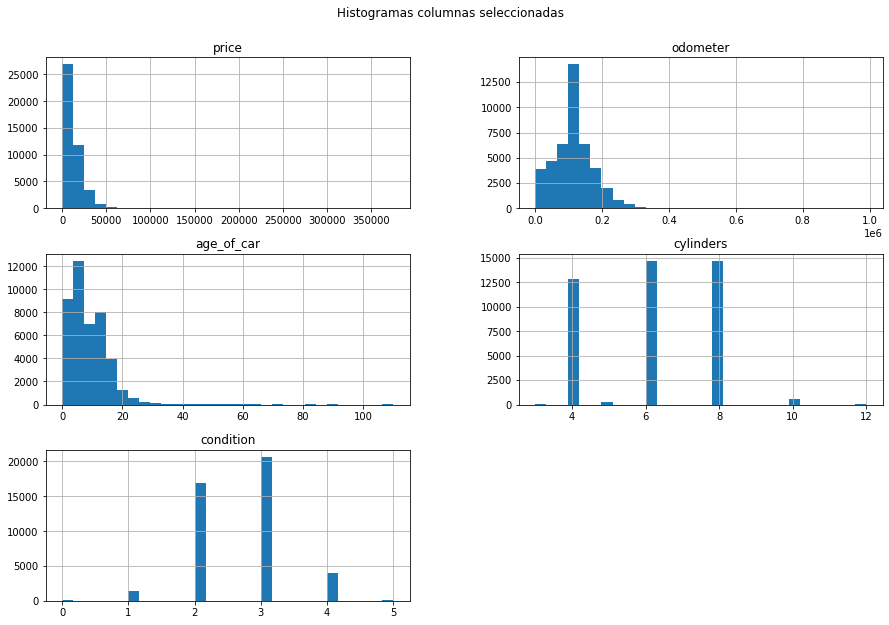

In [36]:
#Vista general de histogramas con columnas seleccionadas
df_nuevo[['price', 'odometer', 'age_of_car', 'cylinders', 'condition']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas columnas seleccionadas', y=0.95);


In [37]:
#Se llama al metodo describe a la columna "price" para observar valores atípicos
df_nuevo['price'].describe()

count     43009.000000
mean      12168.670604
std       10019.342590
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

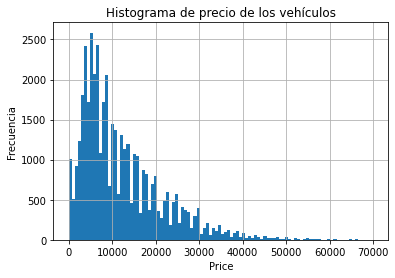

In [38]:
#Se llama solo a histograma de columna "price" para analizar mejor los datos atípicos
df_nuevo['price'].hist(bins=100, range=[0, 70000])

# Se le da titulo a los ejes y al histograma
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title("Histograma de precio de los vehículos");


In [39]:
df_nuevo.query('price > 200000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
10477,375000,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21,5,20,5,2018,19,6052


- **Según lo que refleja el histograma de la columna "price", se observa que existen valores en la venta de autos, que varían entre 1  y 375.000, por lo que se concluye que existen valores atípicos en la columna "price"**

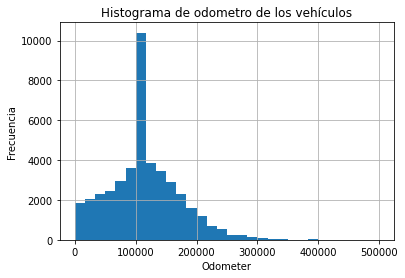

In [40]:
#Se llama solo a histograma de columna "odometer" para analizar si existen datos atípicos
df_nuevo['odometer'].hist(bins=30, range=[0, 500000])

# Se le da titulo a los ejes y al histograma
plt.xlabel('Odometer')
plt.ylabel('Frecuencia')
plt.title("Histograma de odometro de los vehículos");



In [41]:
df_nuevo['odometer'].describe()

count     43009.000000
mean     114967.597038
std       59882.186015
min           0.000000
25%       78840.000000
50%      113000.000000
75%      146345.000000
max      990000.000000
Name: odometer, dtype: float64

In [42]:
df_nuevo.query('odometer > 500000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
2080,5300,2010,toyota corolla,3,4,gas,840000,automatic,sedan,silver,0,2019-02-04,13,0,6,2,2019,9,93333
2416,18500,2014,ford explorer,3,6,gas,866000,automatic,SUV,black,1,2018-07-20,14,4,29,7,2018,4,216500
4837,7500,2015,hyundai elantra,3,4,gas,813542,other,coupe,brown,0,2018-11-21,5,2,47,11,2018,3,271180
9321,5900,2014,chevrolet cruze,2,4,gas,510000,automatic,sedan,silver,0,2019-01-01,21,1,1,1,2019,5,102000
10916,8500,2015,chevrolet malibu,3,4,gas,838095,automatic,sedan,silver,0,2018-05-30,10,2,22,5,2018,3,279365
11691,20000,2012,jeep wrangler,3,6,gas,650000,automatic,truck,white,1,2018-05-23,6,2,21,5,2018,6,108333
11938,6000,1996,ram 2500,2,10,gas,920000,automatic,truck,blue,0,2019-02-02,43,5,5,2,2019,23,40000
13121,7500,2005,chevrolet silverado,2,8,diesel,506025,automatic,truck,black,1,2018-05-28,60,0,22,5,2018,13,38925
14924,20000,2011,gmc sierra 1500,2,8,gas,790000,automatic,pickup,grey,1,2018-09-08,42,5,36,9,2018,7,112857
19188,19999,2014,ram 2500,3,8,gas,580000,automatic,truck,white,1,2019-01-30,36,2,5,1,2019,5,116000


-**En la columna "odometer", se ven muchos datos atípicos, ya que no tiene mucho sentido que un vehículo con 3 años, tenga 813542 kilometros. Este patrón se repite en muchos datos, por lo que estamos hablando de datos problematicos.**

-**Los datos de "odometer" varía entre 0 y 990000, teniendo la media en 115000, por lo que claramente hay valores atípicos**

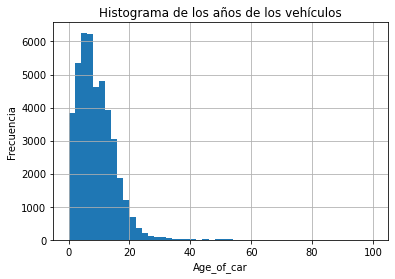

In [43]:
#
df_nuevo['age_of_car'].hist(bins=50, range=[0, 100])

# Se le da titulo a los ejes y al histograma
plt.xlabel('Age_of_car')
plt.ylabel('Frecuencia')
plt.title("Histograma de los años de los vehículos");


In [44]:
df_nuevo['age_of_car'].describe()

count    43009.000000
mean         8.545397
std          6.277680
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_of_car, dtype: float64

In [45]:
df_nuevo.query('age_of_car > 80')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
28329,12995,1908,gmc yukon,2,8,gas,169328,automatic,SUV,black,0,2018-07-06,34,4,27,7,2018,110,1539
28330,12995,1908,cadillac escalade,3,8,gas,113000,automatic,SUV,white,0,2018-06-24,25,6,25,6,2018,110,1027
29004,5000,1936,ford f-150,3,6,gas,30000,manual,pickup,purple,0,2018-11-22,10,3,47,11,2018,82,365
38134,18000,1929,ford f-150,2,8,gas,113000,manual,other,silver,0,2018-11-18,59,6,46,11,2018,89,1269


-**En la columna "age_of_car", se observa que los valores van desde los 0 años hasta los 110 años. Al filtrar los datos por los autos que tienen mas de 80 años, se observan datos extraños, al obvservar la relación entre años, odometro y precio, no tienen mucho sentido.**

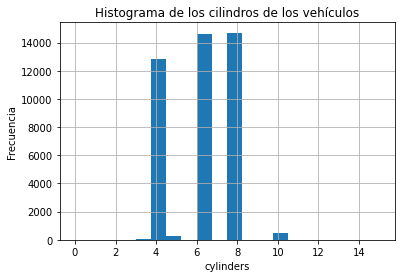

In [46]:
#
df_nuevo['cylinders'].hist(bins=20, range=[0, 15])

# Se le da titulo a los ejes y al histograma
plt.xlabel('cylinders')
plt.ylabel('Frecuencia')
plt.title("Histograma de los cilindros de los vehículos");


In [47]:
df_nuevo['cylinders'].describe()

count    43009.000000
mean         6.126276
std          1.659540
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

-**En el histograma de cilindros, se observan que van desde los 3 cilindros hasta los 12 cilindros, teniendo la mayor cantidad de datos en los 4, 6 y 8 cilindros. No se observan valores atípicos.**

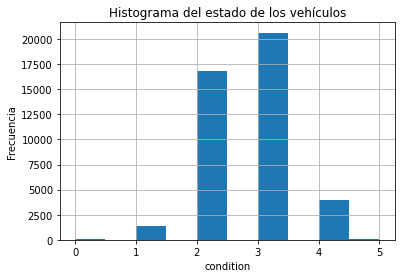

In [48]:
#
df_nuevo['condition'].hist(bins=10, range=[0, 5])

# Se le da titulo a los ejes y al histograma
plt.xlabel('condition')
plt.ylabel('Frecuencia')
plt.title("Histograma del estado de los vehículos");



In [49]:
df_nuevo['condition'].describe()

count    43009.000000
mean         2.637053
std          0.713040
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

-**Se puede observar al estudiar el histograma, que la mayor cantidad de vehículos se encuentran en excelente estado(3) y bueno(2). No se observan datos atípicos.**

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

<AxesSubplot:>

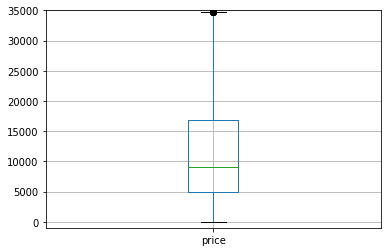

In [50]:
# Determina los límites inferiores para valores atípicos de price
plt.ylim(-1000, 35000)
df_nuevo.boxplot(column='price')


<AxesSubplot:>

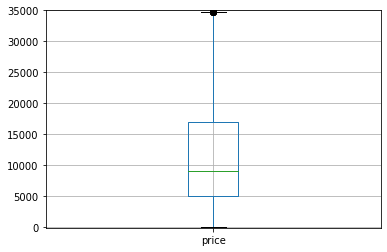

In [51]:
# Determinar los límites superiores para valores atípicos de price
plt.ylim(-100, 35000)
df_nuevo.boxplot(column='price')

<AxesSubplot:>

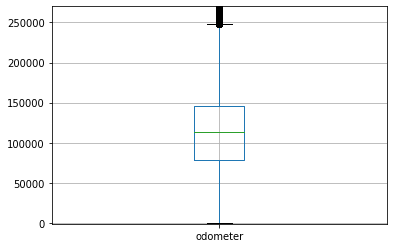

In [52]:
# Determina los límites inferiores para valores atípicos de odometer
plt.ylim(-1000, 270000)
df_nuevo.boxplot(column='odometer')

<AxesSubplot:>

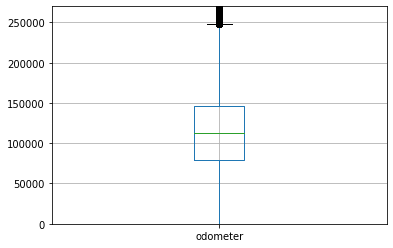

In [53]:
# Determinar los límites superiores para valores atípicos de odometer
plt.ylim(-100, 270000)
df_nuevo.boxplot(column='odometer')

<AxesSubplot:>

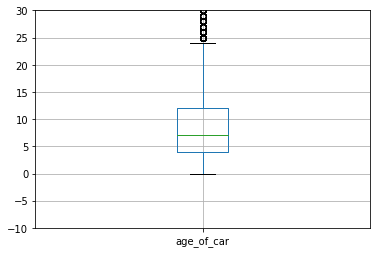

In [54]:
# Determina los límites inferiores para valores atípicos age_of_car
plt.ylim(-10, 30)
df_nuevo.boxplot(column='age_of_car')

<AxesSubplot:>

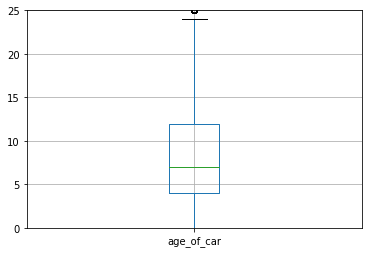

In [55]:
# Determinar los límites superiores para valores atípicos de age_of_car
plt.ylim(0, 25)
df_nuevo.boxplot(column='age_of_car')

In [56]:
# Almacena los datos sin valores atípicos en un DataFrame separado
df_clean = df_nuevo.query('price < 35000 and odometer < 250000 and age_of_car < 25')
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40261 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              40261 non-null  int64         
 1   model_year         40261 non-null  int64         
 2   model              40261 non-null  object        
 3   condition          40261 non-null  int64         
 4   cylinders          40261 non-null  int64         
 5   fuel               40261 non-null  object        
 6   odometer           40261 non-null  int64         
 7   transmission       40261 non-null  object        
 8   type               40261 non-null  object        
 9   paint_color        40261 non-null  object        
 10  is_4wd             40261 non-null  int64         
 11  date_posted        40261 non-null  datetime64[ns]
 12  days_listed        40261 non-null  int64         
 13  dow                40261 non-null  int64         
 14  week  

In [57]:
df_clean["price"].describe()

count    40261.000000
mean     11374.669084
std       7956.769090
min          1.000000
25%       5000.000000
50%       8999.000000
75%      15995.000000
max      34999.000000
Name: price, dtype: float64

## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

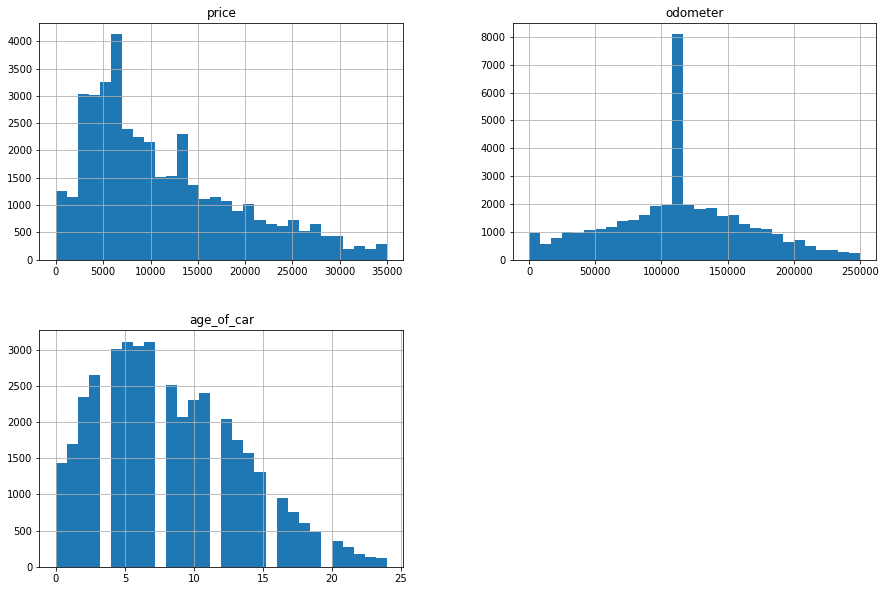

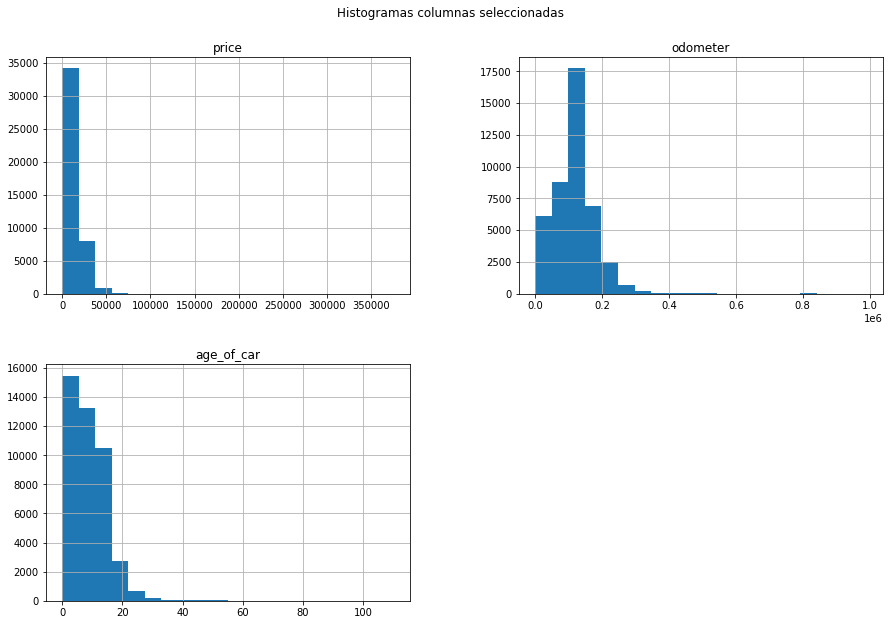

In [58]:
df_clean[['price', 'odometer', 'age_of_car']].hist(bins=30, figsize=(15, 10))
df_nuevo[['price', 'odometer', 'age_of_car']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas columnas seleccionadas', y=0.95);

In [59]:
df_clean[['price', 'age_of_car', 'odometer']].describe()

,price,age_of_car,odometer
count,40261.000000,40261.000000,40261.000000
mean,11374.669084,8.203845,112888.634684
std,7956.769090,5.182252,52013.064545
min,1.000000,0.000000,0.000000
25%,5000.000000,4.000000,81142.000000
50%,8999.000000,7.000000,113000.000000
75%,15995.000000,12.000000,144413.000000
max,34999.000000,24.000000,249870.000000


- **Al observar el data frame filtrado, es decir sin datos atípicos, notamos que se han eliminado los valores atípicos en el conjunto de datos inicial, por ejemplo, el precio máximo de la tabla filtrada es de 34999, y sin filtrar el precio máximo es de 375000. Esto también ocurre con las otras 2 columnas. También, el percentil 50 % de los datos filtrados está más cerca de la media de los datos.**

## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

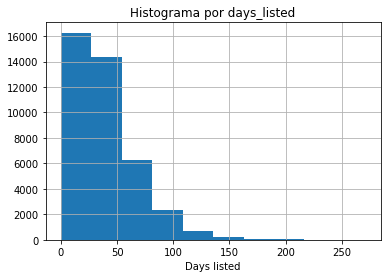

In [60]:
#Hacemos un histograma con la columna "days_listed"
df_clean['days_listed'].hist()

plt.xlabel('Days listed')
plt.title("Histograma por days_listed");

In [61]:
df_clean["days_listed"].describe()

count    40261.000000
mean        39.562380
std         28.186988
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [62]:
df_clean.query('days_listed > 100').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
13,17990,2013,ram 1500,3,8,gas,113000,automatic,pickup,red,1,2018-05-15,111,1,20,5,2018,5,22600
25,29800,2012,chevrolet corvette,3,8,gas,57413,automatic,coupe,orange,0,2018-10-22,101,0,43,10,2018,6,9568
31,9500,2008,toyota highlander,2,6,gas,149799,automatic,SUV,otro,0,2018-06-04,121,0,23,6,2018,10,14979
46,3800,2012,ford focus,2,4,gas,130323,automatic,sedan,black,0,2018-11-29,261,3,48,11,2018,6,21720
76,18800,2015,chevrolet camaro lt coupe 2d,2,6,gas,33926,other,coupe,grey,0,2019-01-16,152,2,3,1,2019,4,8481


In [63]:
df_clean.query('days_listed <= 1').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
34,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,1,2019-03-31,1,6,13,3,2019,10,23400
397,8990,2016,nissan rogue,3,4,gas,121635,automatic,SUV,grey,0,2018-12-14,1,4,50,12,2018,2,60817
699,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,otro,0,2018-05-24,1,3,21,5,2018,2,2499
787,6995,2005,subaru outback,3,4,gas,113000,automatic,wagon,green,1,2018-06-05,1,1,23,6,2018,13,8692
1067,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,1,20,5,2018,10,9330


In [64]:
days_listed_new = df_clean.query('5 <= days_listed <= 100').pivot_table(index="type", values="days_listed", aggfunc=['mean', 'count'])
days_listed_new.columns = ['days_listed_mean', 'vehiculos']
days_listed_new.sort_values(by='days_listed_mean', ascending=False).head(10)

,days_listed_mean,vehiculos
type,,
bus,41.650000,20
hatchback,38.768824,757
wagon,37.959895,1147
offroad,37.767606,142
pickup,37.436597,4913
SUV,37.252053,9256
truck,37.202727,8726
convertible,36.985816,282
sedan,36.908420,9347


-**En el histograma observamos que la mayor cantidad de anuncios dura alrededor de un mes, aunque notamos que existen anuncios que duraron 0 días, por lo que puede significar que ese vehículo se vendió el mismo día del anuncio, por lo que no hubo mas de 1 dia. También vemos que existen anuncios con 271 días, es mucho tiempo, pero no es algo imposible. Por lo que si hablamos de una media de 39 días y una mediana de 33 días, me parece un tiempo razonable para un anuncio.**

-**Podemos concluir que los anuncios se eliminaron rápidamente después de 1 día y los anuncios se publicaron de manera anormal durante 271 días.**

-**Hicimos una tabla filtrada con los vehículos que tuvieron mas de 5 días de anuncio y los que tuvieron menos de 100 días, los filtraremos por tipo de vehículo, ya que me parece un buen parametro para mostrar mas claramente que en esta tabla filtrada las medias de días de anuncio son parecidos para todos los tipos de vehículos.**

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

In [65]:
#Calcular el precio promedio por tipo de vehículo
vehicles_stat_price = df_clean.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean')
vehicles_stat = days_listed_new.join(vehicles_stat_price, on='type').reset_index()
print(vehicles_stat)



           type  days_listed_mean  vehiculos         price
0           SUV         37.252053       9256  10556.697169
1           bus         41.650000         20  16638.800000
2   convertible         36.985816        282  13016.939716
3         coupe         36.077256       1618  13522.813968
4     hatchback         38.768824        757   6765.994716
5      mini-van         36.580092        874   8106.403890
6       offroad         37.767606        142  14757.781690
7         other         36.153409        176  10594.812500
8        pickup         37.436597       4913  15373.394260
9         sedan         36.908420       9347   7026.686530
10        truck         37.202727       8726  15275.410612
11          van         36.536082        485  10284.538144
12        wagon         37.959895       1147   9054.466434


In [66]:
#Ordenar el número de anuncios por tipo de vehículo
df_clean.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'days_listed', aggfunc = 'count').sort_values(by="days_listed", ascending=False)


,days_listed
type,
sedan,9347
SUV,9256
truck,8726
pickup,4913
coupe,1618
wagon,1147
mini-van,874
hatchback,757
van,485


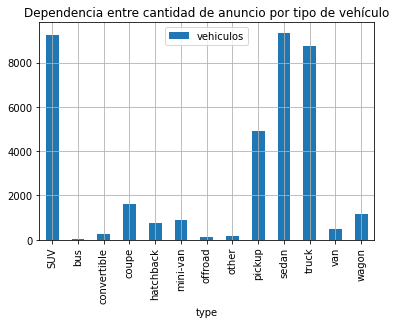

In [67]:
vehicles_stat.plot(x='type', y='vehiculos', title = 'Dependencia entre cantidad de anuncio por tipo de vehículo', kind='bar', grid=True);

-**Los 2 tipos de vehículos con mas anuncios son los tipo SUV y Sedan.**

## Factores de precio

[¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color) traza gráficos de caja y bigotes y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.]

[Utiliza matriz de correlación y diagramas de correlación]

In [68]:
#Crearemos una tabla de los vehículos mas populares según la cantidad de anuncios y analizaremos desde esa tabla
popular_vehicles_filtered = df_clean.query('5 <= days_listed <= 100')
popular_vehicles_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,otro,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,otro,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,5,17627
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,16,11343
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,9,14222
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,5,27914


In [69]:
# Crearemos una tabla de correlación con price y las variables solicitadas
print(popular_vehicles_filtered[['price', 'age_of_car', 'odometer', 'transmission', 'paint_color', 'condition']].corr())


               price  age_of_car  odometer  condition
price       1.000000   -0.530427 -0.398620   0.186293
age_of_car -0.530427    1.000000  0.527247  -0.278847
odometer   -0.398620    0.527247  1.000000  -0.247135
condition   0.186293   -0.278847 -0.247135   1.000000


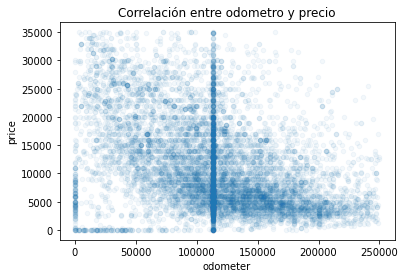

In [70]:
#Veamos la correlación entre precio y odometro con un gráfico Scatter
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y='price', x='odometer', title='Correlación entre odometro y precio', alpha=0.05);

-**Podemos visualizar en el gráfico scatter, que entre mayor es el kilometraje, menor es el precio. Y a su vez a medida que menor es el kilometraje, mayor es el precio**

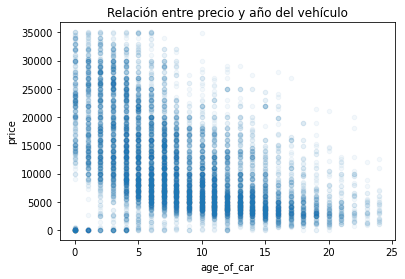

In [71]:
#veremos la relación entre precio y año del vehículo
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y='price', x='age_of_car', title="Relación entre precio y año del vehículo", alpha=0.05);

-**observando el gráfico Scatter, vemos que a medida que el vehículo tiene menos años, mayor es el precio. Por lo que a medida que vehículo tiene menos años, el valor disminuye. Tiene sentido.**

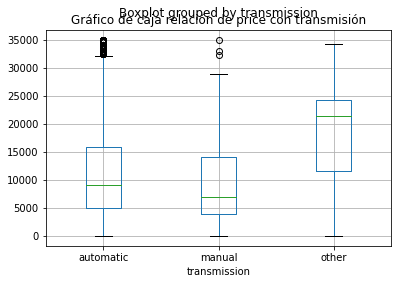

In [72]:
#veremos la relación entre precio y transmisión del vehículo con grafico de caja
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='transmission', column='price'))
plt.title('Gráfico de caja relación de price con transmisión')
plt.show();

-**Podemos concluir al observar el gráfico de caja, que la transmisión influye levemente en el precio, ya que los vehículos con caja automática son levemente mas costosos que los de transmisión manual, se puede llegar a pensar que es porque los de transmisión automática, son mas nuevos.**

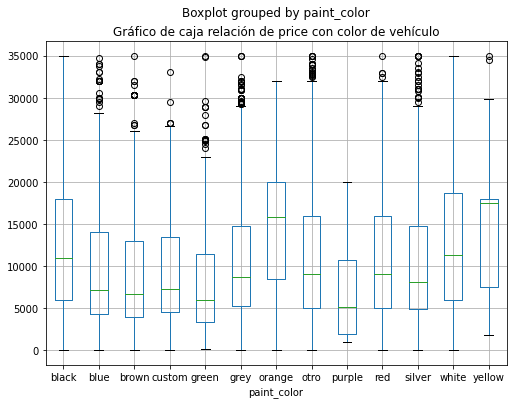

In [73]:
#veremos la relación entre precio y color de vehículo con grafico de caja
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='paint_color', column='price', figsize=(8,6)))
plt.title('Gráfico de caja relación de price con color de vehículo')
plt.show();

-**Se observa en el gráfico de caja, que no hay una correlación clara entre el color del vehículo y el precio.**

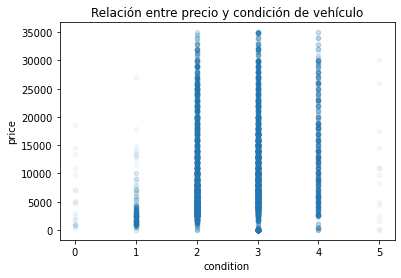

In [74]:
#veremos la relación entre precio y condición del vehículo
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y='price', x='condition', title="Relación entre precio y condición de vehículo", alpha=0.05);

-**No se logra ver bien la relación, por lo que haremos un gráfico de caja para ver mejor la relación.**

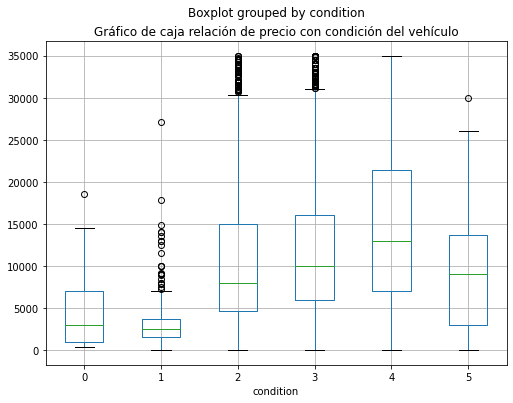

In [75]:
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='condition', column='price', figsize=(8,6)))
plt.title('Gráfico de caja relación de precio con condición del vehículo')
plt.show();

-**Observamos que la condición con más precio es la 4 (nueva). El diagrama de caja muestra vehículos con 1 (justo) y 0 (salvable) tienen el precio más bajo. Esto demuestra que la condición tiene infuencia en el precio.**

## Conclusión general

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

**1-El gráfico de correlación con el kilometraje muestra una correlación negativa, es decir, cuanto mayor sea el kilometraje, menor será el precio.**

**2-Se notó una observación similar en el gráfico de correlación de la edad del vehículo con el precio. Observamos que a medida que aumenta la edad de un vehículo, el precio disminuye. Por el contrario, la gráfica del precio con los años del modelo muestra que a medida que aumenta el año del modelo del vehículo, el precio también aumenta.**

**3-El estado del vehículo es también una caracteristica importante. Observamos a partir de los datos que los automóviles con condiciones buenas, excelentes y como nuevas tienen un precio más alto que los vehículos en otras condiciones.**

**4-Si observamos el gráfico de caja de la correlación del tipo de transmisión con el precio, podemos ver que los automóviles con transmisión automática tienen un precio más alto que los del tipo de transmisión manual. Esto muestra que el tipo de transmisión es un factor importante que afecta el precio del vehículo.**

**5-La distribución del precio del vehículo con el color, no refleja una diferencia significativa, por lo que no existe mucha relación.**

### Para poder llegar a esta conclusión, se realizó lo siguiente:

-**Primero se analizaron los datos ausentes de cada columna del df. Después se sacó el % de esos valores ausentes por columna, llegando a la conlcusión que los datos ausentes de las columnas con menos %,  "model_year" y "cylinders", se eliminarían. Las otras 3 columnas se transformaron los valores ya que el % de ausentes era mayor**

-**Luego se trabajo cambiando las columnas con tipo float a int para realizar un mejor analisis.**

-**Luego en la columna "date_posted", se cambió de tipo objeto a datatime. Además creamos columnas de día de la semana, semana y mes de cuando fue publicado el anuncio**

-**Luego se crearon columnas de "age_of_car" y "avg_odometer_year" y se cambiaron los parametro de la columna "condition" por valores numéricos. En la columna "avg_odometer_year" aparecieron valores inf, por lo que los cambiamos a NaN y posteriormente cambiamos los NaN a valores 0.**

-**Se realizaron histrogramas de las columnas a analizar para tener una vista general. Luego, se hicieron diferentes histogramas para analizar los valores atípicos. Se evaluaron los valores atípicos con gráficos de caja y se empezó a trabajar con los valores filtrados sin valores atípicos.**

-**comenzamos a trabajar con los días de publicación en nuestro nuevo dataframe, y comparamos con histogramas entre el antiguo dataframe y el nuevo.**

-**Concluimos que con el nuevo dataframe, que la media de los dias de anuncio eran de 39 días, por lo que empezamos a trabajar desde ahí.**

-**Comenzamos a ver la correlación entre el precio del vehículo con las columnas de edad, millaje, condición, tipo de transmisión y color del vehículo, teniendo solo en cuenta los vehículos con mas de 50 anuncios.**